Tweetpy start

In [ ]:
from datetime import date
import time
import webbrowser
import tweepy
import requests

API_key = "-"
API_Key_Secret = "----"

callback_uri = 'oob' # https://cfe.sh/twitter/callback
auth = tweepy.OAuthHandler(API_key, API_Key_Secret, callback_uri)

print(redirect_url)

https://api.twitter.com/oauth/authorize?oauth_token=eGBBAwAAAAABdfEpAAABgaxIiHk


In [ ]:
pin_input = input("PIN: \n")
auth.get_access_token(pin_input)

KeyboardInterrupt: ignored

In [ ]:
word_input = input("Enter a word for analysis ")

Enter a word for analysis Tesla


In [ ]:
from requests_oauthlib import OAuth1Session
import os
import json

max_results = 100

api = tweepy.API(auth)
oauth = OAuth1Session(API_key, API_Key_Secret)

access_token = '-----'
access_token_secret = '----'

oauth = OAuth1Session(
    API_key,
    API_Key_Secret,
    resource_owner_key=access_token,
    resource_owner_secret=access_token_secret,
)

query_in = word_input + "lang:en"

query = """{word} lang:en""".format(word=word_input)

params = {"query":query,"max_results":max_results}

response = oauth.get(
    "https://api.twitter.com/2/tweets/search/recent", params=params
)

if response.status_code != 200:
    raise Exception(
        "Request returned an error: {} {}".format(response.status_code, response.text)
    )

print("Response code: {}".format(response.status_code))
json_response = response.json()
json_helper = json.dumps(json_response, indent=4, sort_keys=True)
#print(json_helper)


Response code: 200


Trying to take out the data from the pull 

In [ ]:
resp_dict = json.loads(json_helper)



for i in range(max_results):
  print(resp_dict['data'][i]['text'])


RT @OrdinaryGamers: The Tesla model x looks so fucking gross lmao.
Where's @elonmusk 🤔 #ElonMusk #Tesla #Twitter
RT @cb_doge: Happy Birthday - Technoking of Tesla, The Dogefather Elon Musk 🎂

Thank you for everything you do for humanity. @elonmusk http…
RT @RealDanODowd: Watch this @Tesla #FSD 10.12.2 fail video: "So right now it stopped in the middle of these two lanes, completely in the m…
@etherside @EDWARDCOUGHLI12 @elonmusk @Tesla Yes they have finished a lot of the preliminary work to get autopilot 2 or whatever the level is we are on but bc if the regulations things are staled. Elon also said he was going to lay off before he needed to in preparation for recession
🚗 @atmcarofficial-a #web3 lifestyle APP that combines #SocialFi and #GameFi elements is thrilled to launch their #Airdrop

🤑Are you ready to grab your car #NFT and the chance to win #TESLA MODEL 3 Real Car?🔥

Click⏬grab yours
https://t.co/n9IPN8R7yj

#BSC #AMTCAR #Blockchain
RT @alex_avoigt: VW CEO Diess "Tesla is weak

Trying to get score 

In [ ]:
import nltk
import re
from nltk.sentiment.vader import SentimentIntensityAnalyzer 
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

Trying to get score, making a dataframe

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import linear_model

In [ ]:
dataframe = pd.DataFrame(resp_dict['data'])


dataframe["row_id"] = dataframe.index + 1
#create a new data frame with "id" and "comment" fields
df_subset = dataframe[['row_id', 'text']].copy()
#data clean-up
#remove all non-aphabet characters
df_subset['text'] = df_subset['text'].str.replace("[^a-zA-Z#]", " ")
#covert to lower-case
df_subset['text'] = df_subset['text'].str.casefold()



df1=pd.DataFrame()
df1['row_id']=['99999999999']
df1['sentiment_type']='NA999NA'
df1['sentiment_score']=0


print('\nProcessing sentiment analysis...\n')
sid = SentimentIntensityAnalyzer()
t_df = df1
for index, row in df_subset.iterrows():
    scores = sid.polarity_scores(row[1])
    for key, value in scores.items():
        temp = [key,value,row[0]]
        df1['row_id']=row[0]
        df1['sentiment_type']=key
        df1['sentiment_score']=value
        t_df=t_df.append(df1)
#remove dummy row with row_id = 99999999999
t_df_cleaned = t_df[t_df.row_id != '99999999999']
#remove duplicates if any exist
t_df_cleaned = t_df_cleaned.drop_duplicates()
# only keep rows where sentiment_type = compound
t_df_cleaned = t_df[t_df.sentiment_type == 'compound']


df_output = pd.merge(dataframe, t_df_cleaned, on='row_id', how='inner')

df_output[["sentiment_score"]].describe()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning:

The default value of regex will change from True to False in a future version.




Processing sentiment analysis...



,sentiment_score
count,100.000000
mean,0.348963
std,0.469441
min,-0.750600
25%,0.000000
50%,0.400800
75%,0.880700
max,0.942300


Import statements 

Linear Regression for analysis

[-9.30927093e-05]
0.3536641818181818


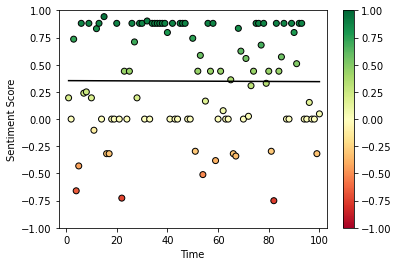

In [ ]:
reg = linear_model.LinearRegression()
reg.fit(t_df_cleaned[['row_id']],t_df_cleaned['sentiment_score'])

t = t_df_cleaned.sentiment_score

%matplotlib inline 
plt.xlabel('Time')
plt.ylabel('Sentiment Score')
plt.scatter(t_df_cleaned.row_id, t_df_cleaned.sentiment_score, c = t, edgecolors='black', cmap = 'RdYlGn', vmin = -1.0, vmax = 1.0)
plt.plot(t_df_cleaned.row_id, reg.predict(t_df_cleaned[['row_id']]), color = 'black')

adder = max_results / 35
plt.axis([-adder, max_results + adder, -1.0, 1.0])


plt.colorbar()

print(reg.coef_)
print(reg.intercept_)